# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sqlite3
%matplotlib inline

In [ ]:
# connect to your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mengambil Data dari Olist Database

In [ ]:
#Query untuk menghubungkan SQL ke table yang ada pada database
def get_result(query):
    conn = sqlite3.connect("/content/drive/MyDrive/Pacmann-AI-ML/Project/olist.db")
    cursor = conn.cursor()
    cursor.execute(query)
    data = pd.DataFrame(cursor.fetchall(),columns=[description[0] for description in cursor.description])
    return data

In [ ]:
#Pada case ini saya memutuskan untuk menggunakan 4 table berikut
data_1 = get_result('select * FROM olist_order_dataset')
data_2 = get_result('select * FROM olist_order_items_dataset')
data_3 = get_result('select * FROM olist_products_dataset')
data_4 = get_result('select * FROM product_category_name_translation')

In [ ]:
#Join semua table
datas = get_result("select * FROM olist_order_items_dataset LEFT JOIN olist_order_dataset using(order_id) LEFT JOIN olist_products_dataset using(product_id) LEFT JOIN product_category_name_translation using(product_category_name)")

# Pre-EDA

In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index                          112650 non-null  int64  
 1   order_id                       112650 non-null  object 
 2   order_item_id                  112650 non-null  int64  
 3   product_id                     112650 non-null  object 
 4   seller_id                      112650 non-null  object 
 5   shipping_limit_date            112650 non-null  object 
 6   price                          112650 non-null  float64
 7   freight_value                  112650 non-null  float64
 8   index                          112650 non-null  int64  
 9   customer_id                    112650 non-null  object 
 10  order_status                   112650 non-null  object 
 11  order_purchase_timestamp       112650 non-null  object 
 12  order_approved_at             

In [ ]:
datas.sample(5)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index,customer_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index,product_category_name_english
55294,55294,7db9d39a5077a2cbe00cfad310d2a938,1,99a4788cb24856965c36a24e339b6058,53d00c40e32aeb924a84ce72b1af869d,2018-05-07 02:10:50,83.79,5.88,58585,c8989858ca604ef323b30deed0422d02,...,cama_mesa_banho,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,3.0,bed_bath_table
112475,112475,ff9770f7299db492e5fe01b4a231341b,2,67bd616e1ba0d3d3e8545f3113b0140d,e9779976487b77c6d4ac45f75ec7afe9,2018-03-16 07:50:28,16.49,18.23,79544,c57b89d756843557ab53f7c679ea0572,...,beleza_saude,57.0,3153.0,1.0,300.0,18.0,18.0,18.0,0.0,health_beauty
86393,86393,c43de9faa95d5014569aa1ec9ac83554,1,3fbc0ef745950c7932d5f2a446189725,06a2c3af7b3aee5d69171b0e14f0ee87,2018-07-18 09:10:15,66.99,27.75,13083,ab3f65f2a61ccb5569a2af3c163330ec,...,beleza_saude,50.0,1257.0,1.0,350.0,19.0,12.0,13.0,0.0,health_beauty
85641,85641,c282161ce9696af2790e633f567dd179,1,3ae13337333ac7ba984074d5a6349074,d13e50eaa47b4cbe9eb81465865d8cfc,2018-08-14 18:30:22,369.90,23.89,10486,452244dbda646faab3abb99c86d2b4c2,...,esporte_lazer,55.0,1294.0,2.0,3325.0,32.0,31.0,28.0,5.0,sports_leisure
14980,14980,221ec4c4f942cf32d965d9a70a188b75,1,afe60f026d04f54945ecf4c085eff7f5,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 22:50:27,199.89,10.81,9316,63726785895b4f00d302a0ad74d6fbab,...,informatica_acessorios,56.0,235.0,1.0,633.0,26.0,13.0,12.0,1.0,computers_accessories


In [ ]:
#Memisahkan data untuk analisis Lebih Lanjut berdasarkan status pemesanan delivered & non_delivered
delivered = datas[datas["order_status"]=='delivered']
non_delivered = datas[datas["order_status"]!='delivered']

# Cleaning & EDA Data (Delivered Order Status)

## Cleaning the Data

### Penanganan Nilai Null

In [ ]:
delivered.shape

(110197, 27)

In [ ]:
#Pengecekan nilai null dalam format percentage
delivered.isnull().sum().sort_values(ascending=False)/len(delivered)*100

product_category_name_english    1.414739
index                            1.414739
product_photos_qty               1.394775
product_description_lenght       1.394775
product_name_lenght              1.394775
product_category_name            1.394775
product_width_cm                 0.016334
product_height_cm                0.016334
product_length_cm                0.016334
product_weight_g                 0.016334
order_approved_at                0.013612
order_delivered_customer_date    0.007260
order_delivered_carrier_date     0.001815
order_id                         0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
index                            0.000000
order_status                     0.000000
customer_id                      0.000000
index                            0.000000
freight_value                    0.000000
price                            0.000000
shipping_limit_date              0.000000
seller_id                        0

Persentase nilai null masih di bawah 5%, dan saya memutuskan untuk menghapus semua baris dengan nilai null tersebut.

In [ ]:
delivered.dropna(inplace=True)

<ipython-input-11-66d279143fa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered.dropna(inplace=True)


In [ ]:
#Jumlah data setelah dilakukan penghapusan nilai null
delivered.shape

(108614, 27)

### Penanganan Nilai Duplikat

In [ ]:
#Pengecekan jumlah data duplikat data
delivered.duplicated(subset=["order_id","product_id","customer_id","order_purchase_timestamp"]).sum()

9862

In [ ]:
#Menghilangkan data duplikat
delivered.drop_duplicates(subset=["order_id","product_id","customer_id","order_purchase_timestamp"],keep="first",inplace=True)

<ipython-input-14-8322ef13fecc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered.drop_duplicates(subset=["order_id","product_id","customer_id","order_purchase_timestamp"],keep="first",inplace=True)


In [ ]:
#Pengecekan jumlah data setelah menghilangkan data duplikat
delivered.shape

(98752, 27)

### Penanganan Feature yang Berpotensi Tidak Digunakan

In [ ]:
#Product_category_name dihapus karena kami hanya menggunakan preferensi dalam literatur bahasa Inggris pada feature product_category_name_english
delivered=delivered.drop(['index','seller_id','product_category_name','shipping_limit_date'],axis=1)

### Melakukan Perubahan Tipe Data

In [ ]:
#Mengubah tipe data objek menjadi tipe data datetime
time_feature = ["shipping_limit_date","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for i in delivered.columns:
  for j in time_feature:
    if i == j:
      delivered[i]= pd.to_datetime(delivered[j])

In [ ]:
data_4.duplicated(subset="product_category_name").sum()

0

Dari tabel product_category_name_translation kita dapat melihat setiap baris product_category_name dengan product_category_name_english unik dan tidak memiliki duplikasi data, sehingga kita dapat membuat asumsi setiap baris berbeda adalah item yang berbeda dan tidak perlu diubah ke nama lain/tertentu.

## EDA & Visualization

### 1. Visualisasi Distribusi Data (General)

In [ ]:
#Pengecekan statistik deskriptif pada data
delivered.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,98752.0,NaN,NaN,NaN,56361.292126,32520.348148,0.0,28235.75,56412.5,84543.25,112649.0
order_id,98752,95104,ca3625898fbd48669d50701aba51cd5f,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,98752.0,NaN,NaN,NaN,1.047037,0.279718,1.0,1.0,1.0,1.0,21.0
product_id,98752,31614,99a4788cb24856965c36a24e339b6058,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,98752,2912,6560211a19b47992c3666cc44a7e94c0,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipping_limit_date,98752,90107,2017-11-29 02:36:26,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,98752.0,NaN,NaN,NaN,123.82297,187.308202,0.85,40.0,78.0,139.0,6735.0
freight_value,98752.0,NaN,NaN,NaN,20.104701,15.817598,0.0,13.15,16.35,21.23,409.68
index,98752.0,NaN,NaN,NaN,49729.697009,28718.001621,0.0,24881.75,49734.5,74606.25,99440.0
customer_id,98752,95104,0d861a5e4dd6a9079d89e1330848f0ab,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Pengelompokkan Tipe Data Numeric
numeric = delivered.select_dtypes(include=['int64','float64']).columns

In [ ]:
#Pengelompokkan Tipe Data Categorical
categoric = delivered.select_dtypes(include=['object']).columns

<ipython-input-22-2346e38977b3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivered[numeric[i]], color='green')
<ipython-input-22-2346e38977b3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivered[numeric[i]], color='green')
<ipython-input-22-2346e38977b3>:5: UserWarning: 

`distplo

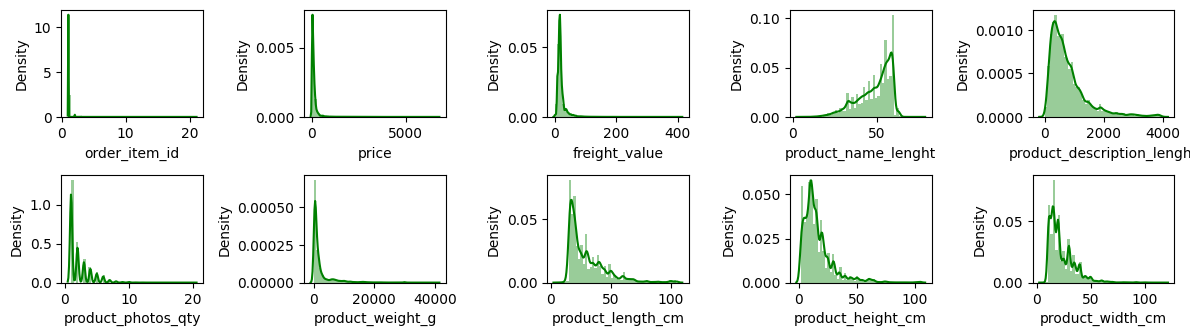

In [ ]:
#Pengecekan Distribusi Data & Data Outlier
plt.figure(figsize=(12, 8))
for i in range(0, len(numeric)):
    plt.subplot(5, 5, i+1)
    sns.distplot(delivered[numeric[i]], color='green')
    plt.tight_layout()

Terlihat bahwa distribusi data terlihat skewed karena adanya outlier, namun untuk kepentingan visualisasi dan pertimbangan ingin melihat keadaan asli data yang ada, saya memutuskan untuk tidak menghilangkan outlier tersebut, karena bisa jadi outlier tersebut merupakan bagian dari variasi data dan menjadi penunjang informasi yang penting kedepannya.

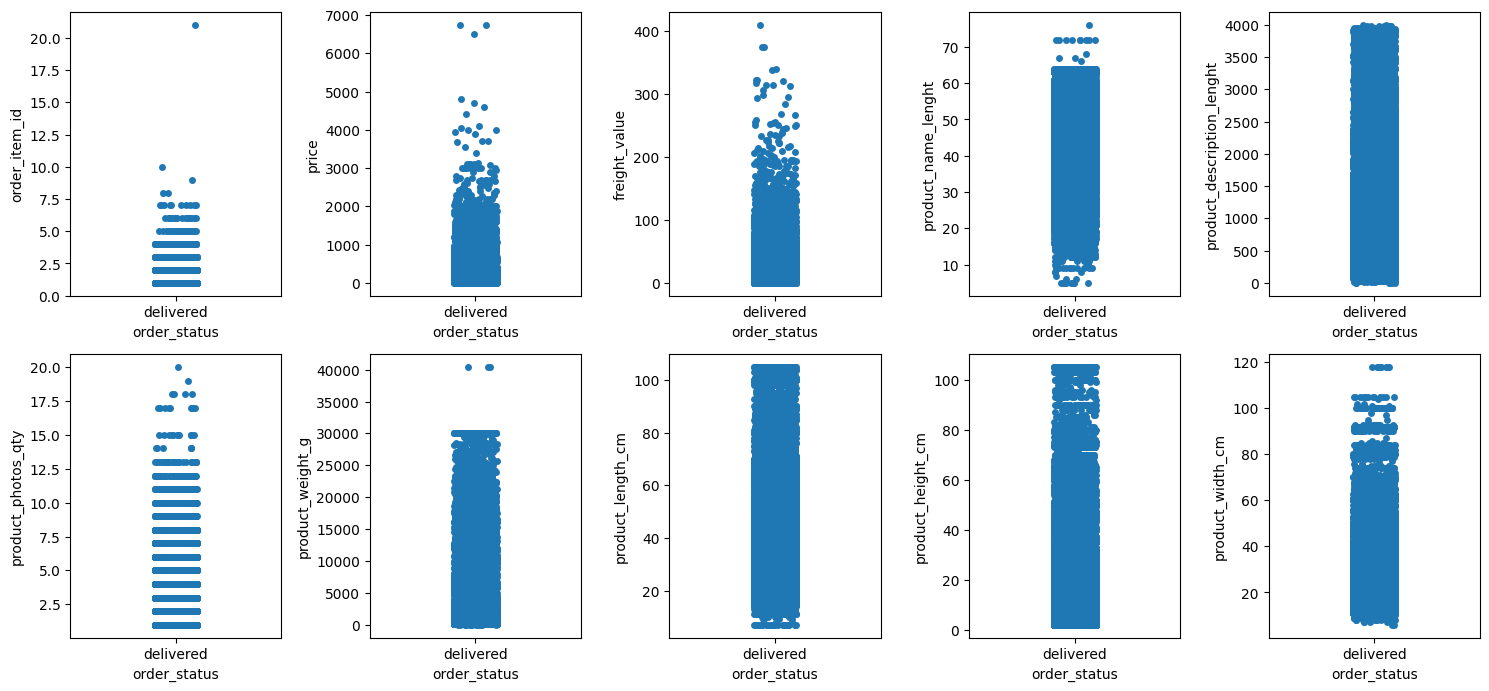

In [ ]:
#Pengecekan distribusi data bertipe numeric terhadap order status "delivered"
fig = plt.figure(figsize=(15, 10))
for i in range(0, len(numeric)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 5, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=delivered, x='order_status', y=numeric[i]) # gambar catplot/stripplotnya
    plt.tight_layout() # layout

    #if i != 0: plt.close(i+1) # close figure

    #plt.close(len(nums) + 1) # close figure

### 2. Visualisasi Total Penjualan dari Setiap Kategori Produk

In [ ]:
#Melakukan aggregasi data untuk melihat distribusi data order dengan total nominal penjualan tertinggi hingga terendah per kategori produk
pd.set_option("display.max_rows",None)
delivered['del_total_harga']=delivered['order_item_id']*delivered['price']
del_sales = delivered.groupby(['product_category_name_english']).agg({'del_total_harga': ['sum']}).reset_index()
del_sales.columns = ['product_category_name_english','total_nominal_penjualan']
del_sales=del_sales.sort_values(by="total_nominal_penjualan",ascending=False)

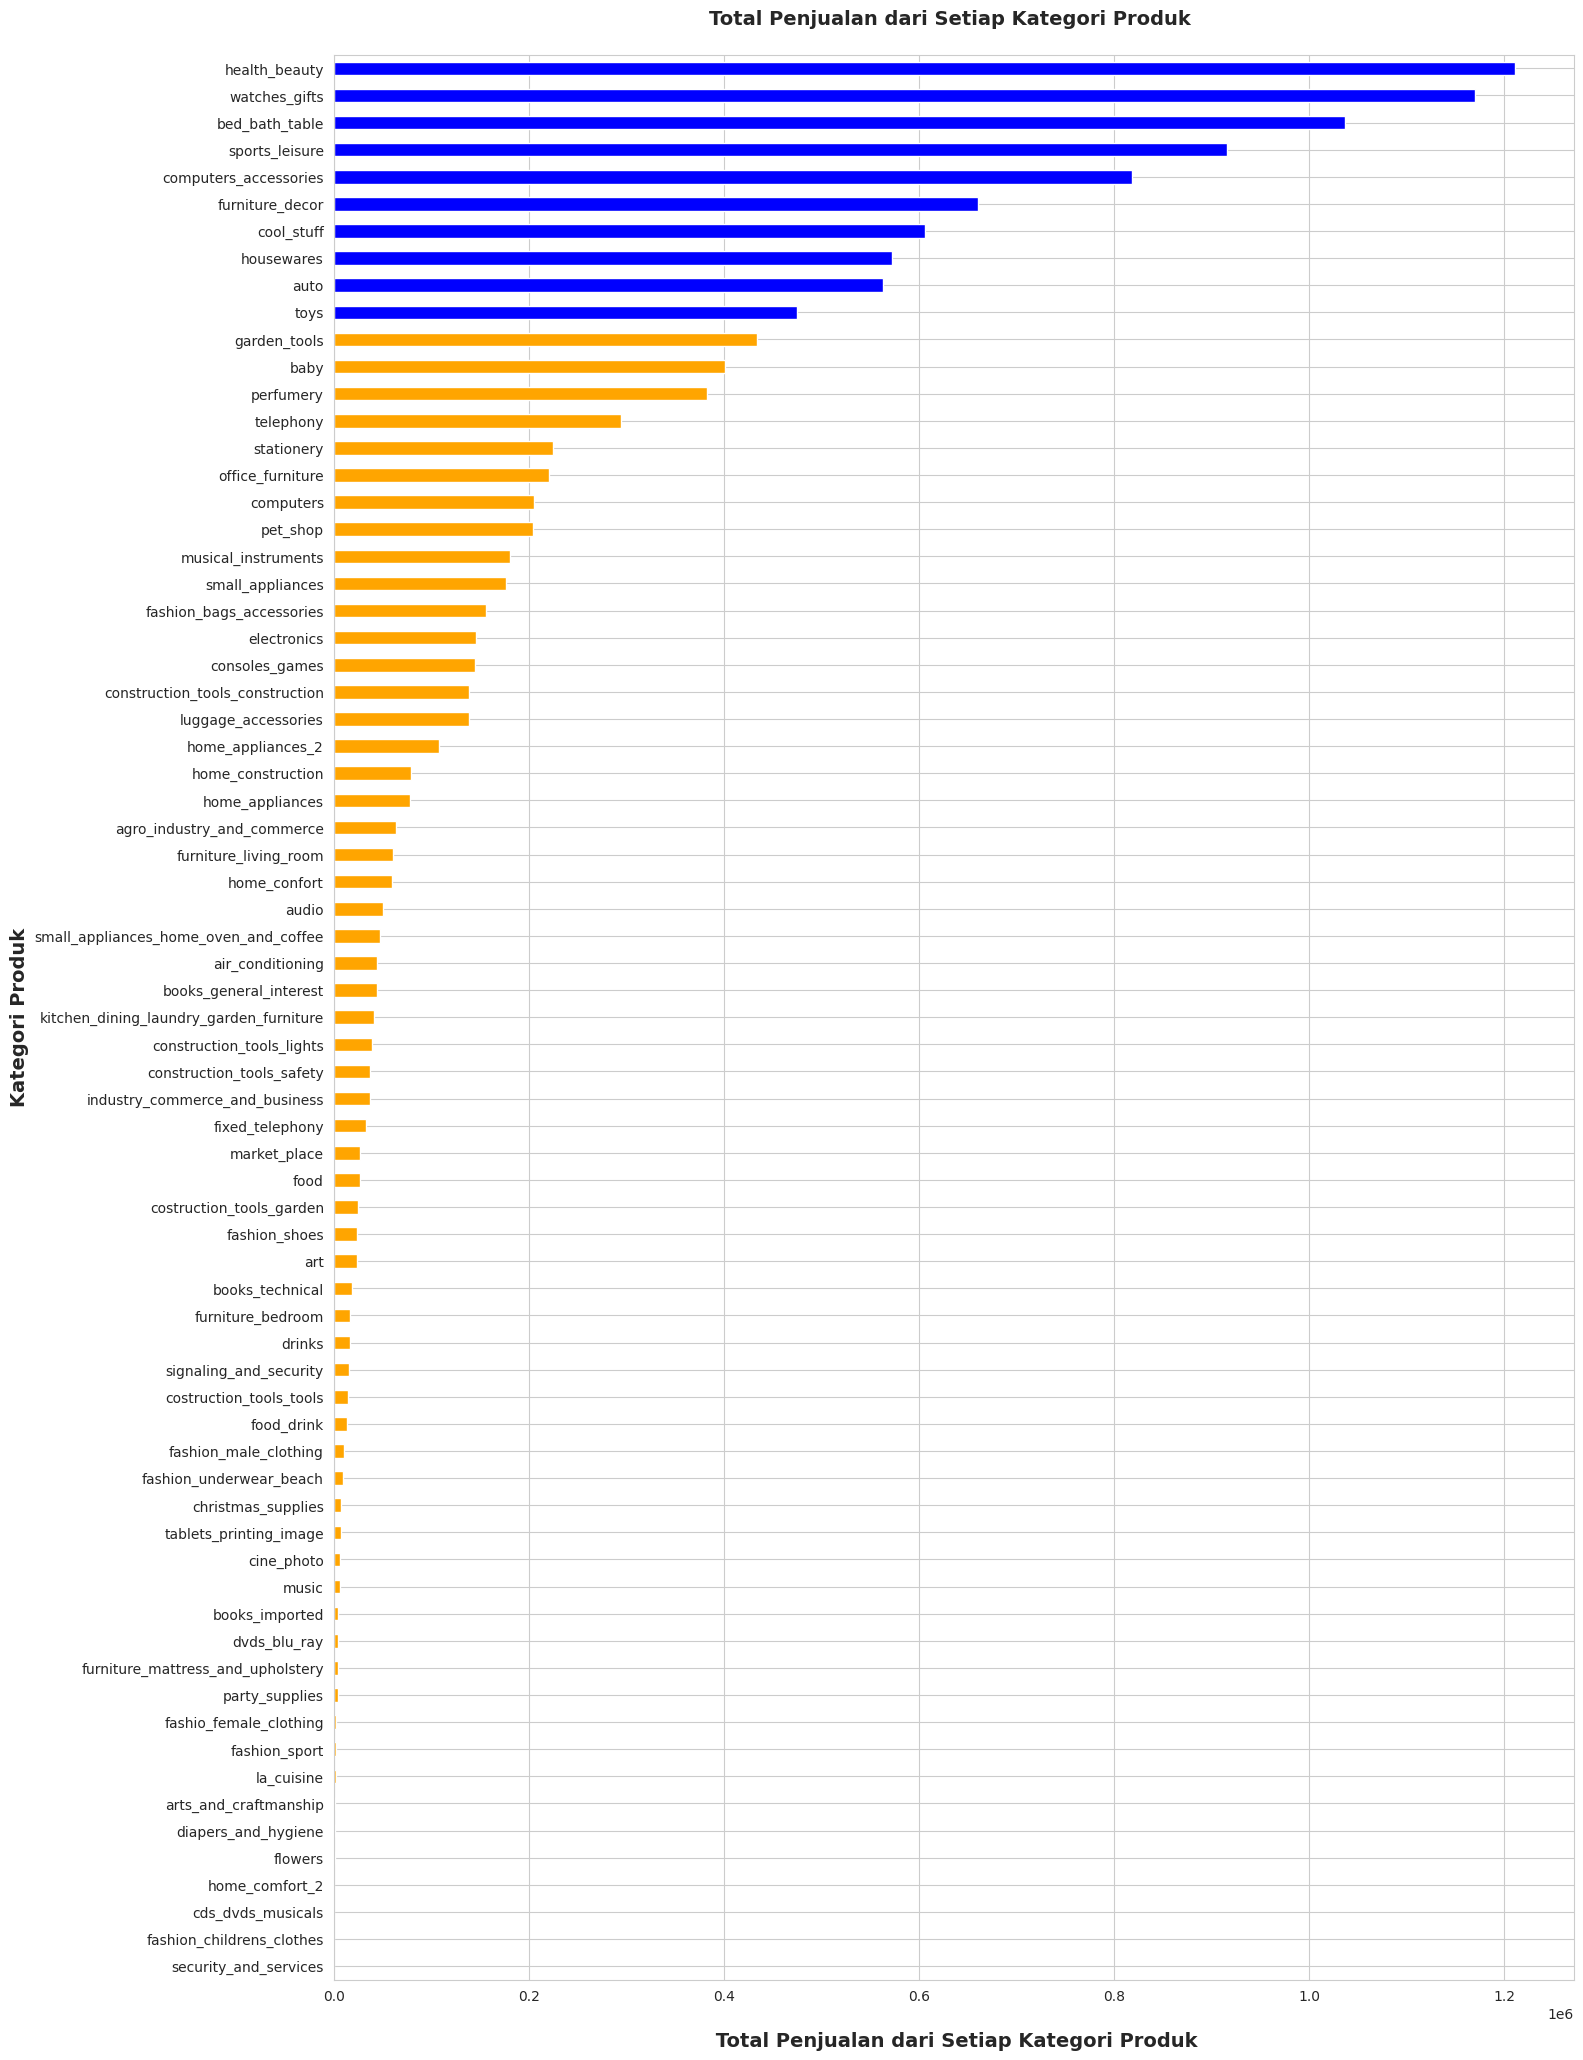

In [ ]:
#Visualisasi data berdasarkan hasil group by data sebelumnya yang tersimpan pada variabel del_sales
sns.set_style("whitegrid")

values = np.array(del_sales['total_nominal_penjualan'])
clrs = ['blue' if (x in values[0:10]) else 'orange' for x in values ]

ax = del_sales.plot(x='product_category_name_english', y='total_nominal_penjualan', kind='barh', figsize=(16, 25), color=clrs);
ax.invert_yaxis()

plt.xlabel('\n Total Penjualan dari Setiap Kategori Produk', weight='bold',fontsize=14)
plt.ylabel('Kategori Produk', weight='bold', fontsize=14)
plt.title('Total Penjualan dari Setiap Kategori Produk \n', weight='bold', fontsize=14);
plt.legend().set_visible(False)

### 2. Visualisasi Pengecekan 10 Produk Kategori Barang yang Paling Diminati

In [ ]:
pd.set_option("display.max_rows",None)
del_counts = delivered.groupby(['product_category_name_english']).agg({'order_item_id': ['sum']}).reset_index()
del_counts.columns = ['product_category_name_english','jumlah_total_order']
del_counts=del_counts.sort_values(by="jumlah_total_order",ascending=False)

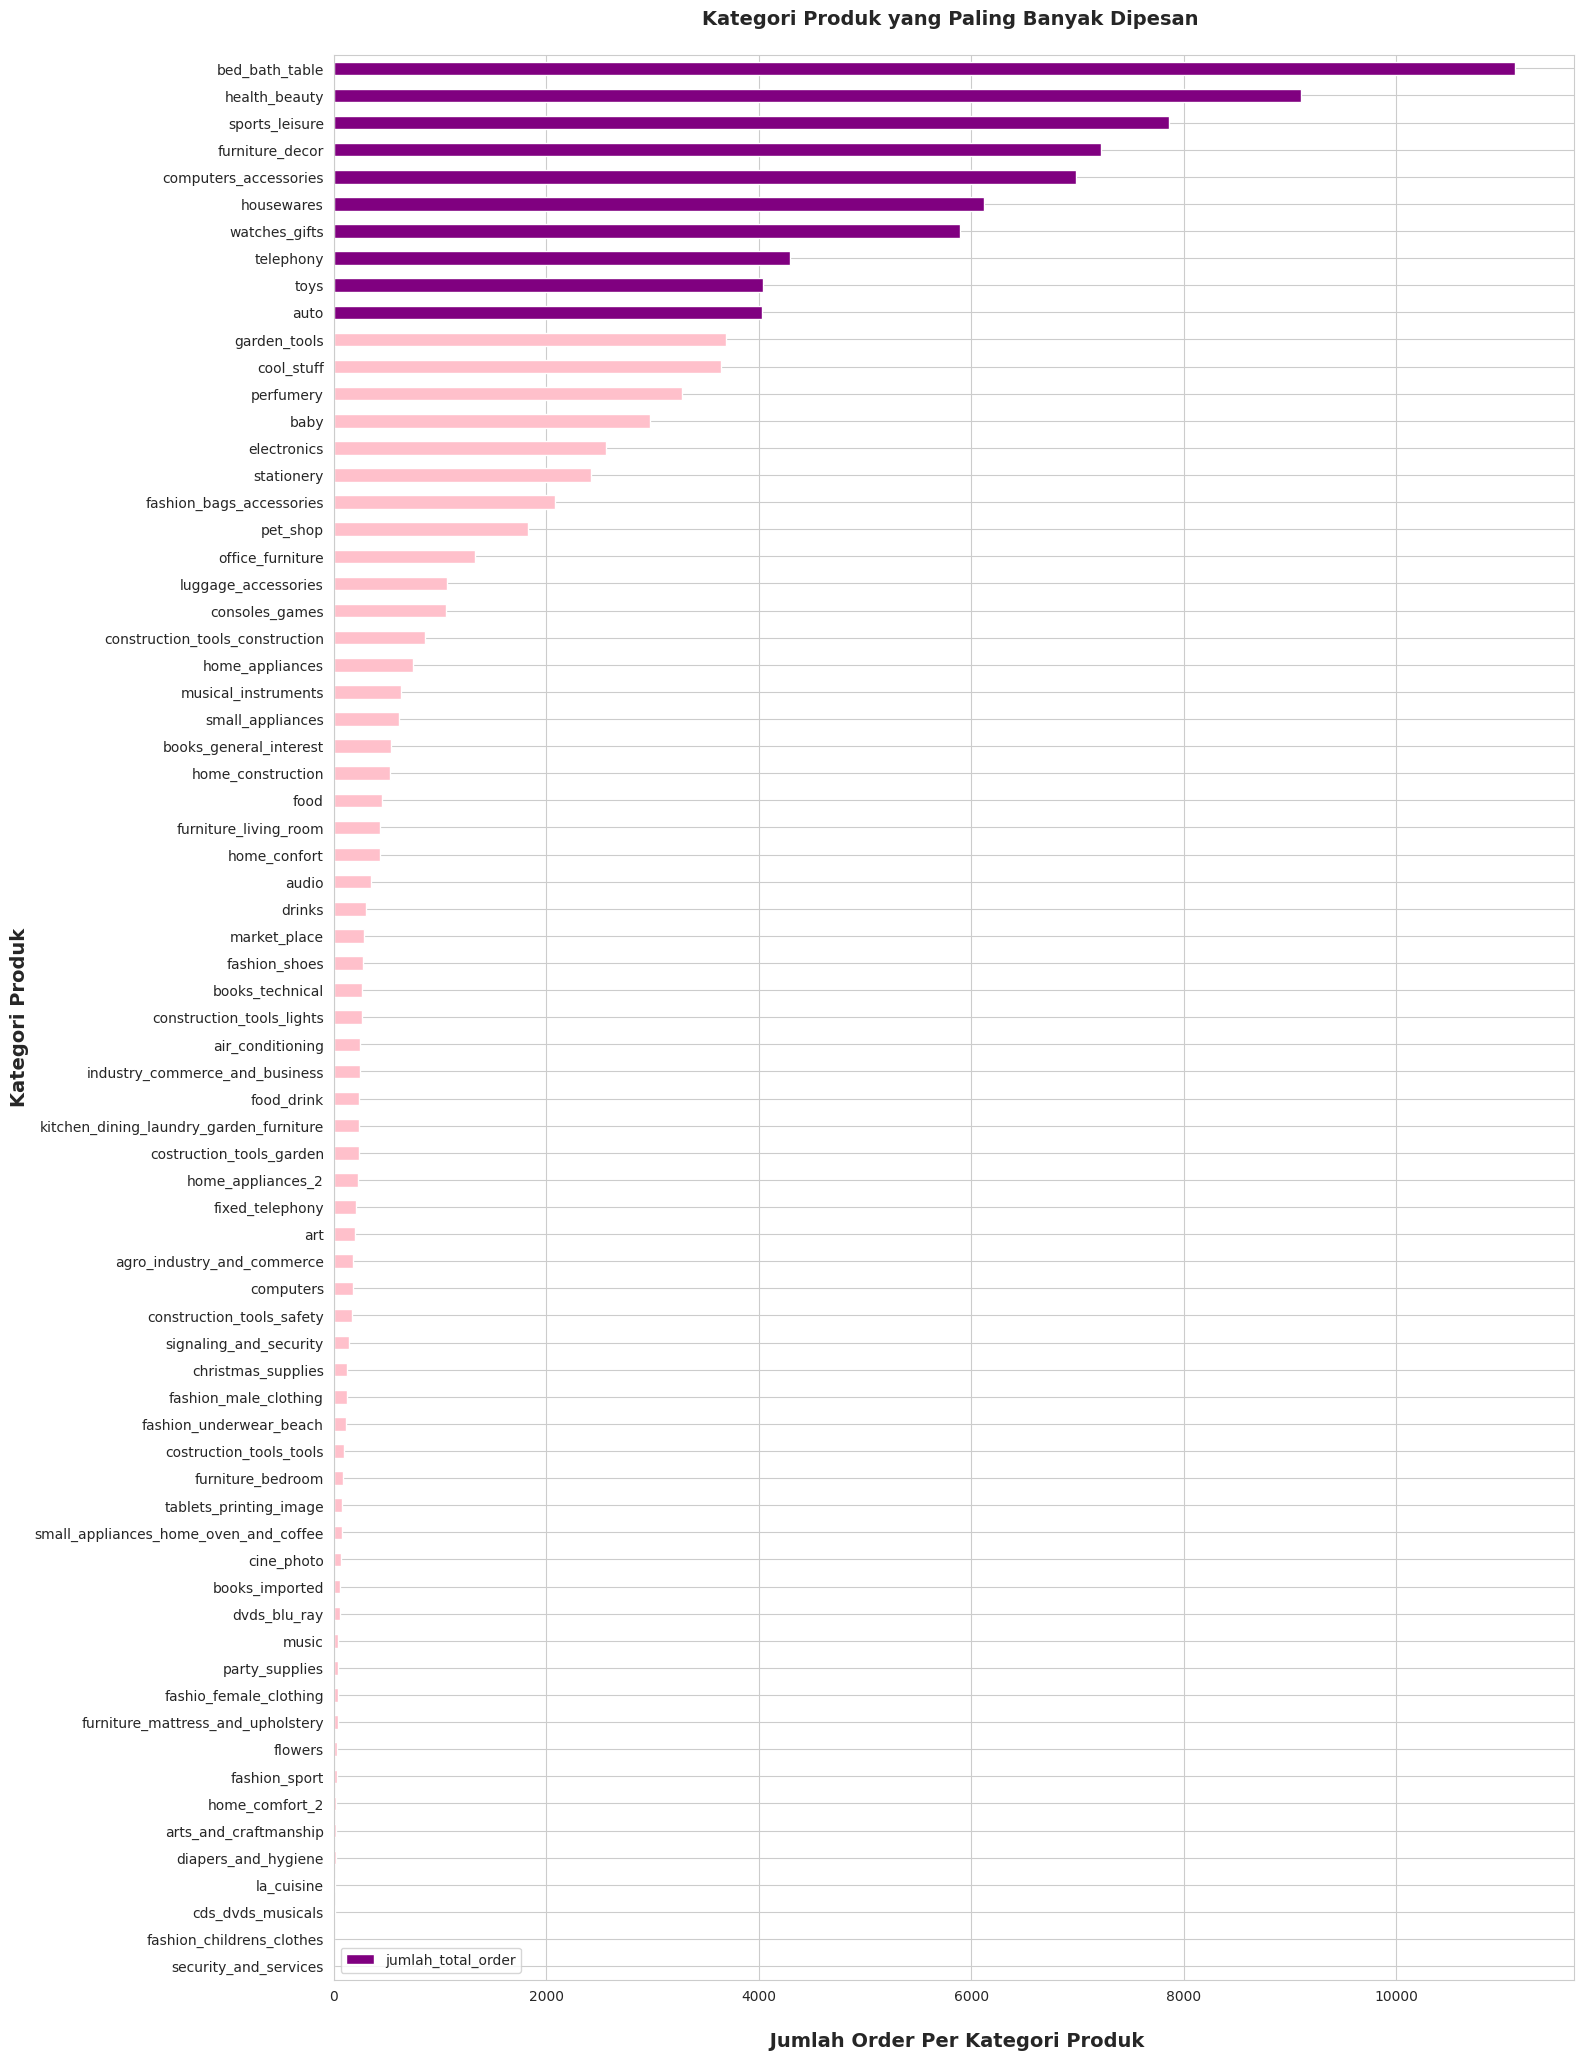

In [ ]:
#Visualisasi pengecekan pada group by data sum() order_item_id
sns.set_style("whitegrid")

values = np.array(del_counts['jumlah_total_order'])
clrs = ['purple' if (x in values[0:10]) else 'pink' for x in values ]

ax = del_counts.plot(x='product_category_name_english', y='jumlah_total_order', kind='barh', figsize=(16, 25), color=clrs);
ax.invert_yaxis()

plt.xlabel('\n Jumlah Order Per Kategori Produk', weight='bold',fontsize=14)
plt.ylabel('Kategori Produk', weight='bold', fontsize=14)
plt.title('Kategori Produk yang Paling Banyak Dipesan \n', weight='bold', fontsize=14);

### 3. Pertumbuhan dari Waktu ke Waktu

#### 3.1 Pengecekan Tren dari Tahun ke Tahun

In [ ]:
delivered['day'] = delivered['order_purchase_timestamp'].dt.day_name()
delivered['month'] = delivered['order_purchase_timestamp'].dt.month
delivered['year'] = delivered['order_purchase_timestamp'].dt.year

In [ ]:
#data rangkuman dengan 10 produk terbanyak
time_viz=delivered[delivered['product_category_name_english'].isin(["bed_bath_table","healthy_beauty","sports_leisure","furniture_decor","computer_accessories","housewares","watches_gifts","telephony","toys","auto"])]

In [ ]:
#Mencari trend tahunan
del_growth = pd.DataFrame(time_viz.groupby(['product_category_name_english','year']).agg({'order_item_id': ['sum']}).reset_index())
del_growth.columns=["product_category_name","year","order_item_id"]
del_growth=del_growth.sort_values(by="order_item_id",ascending=False)

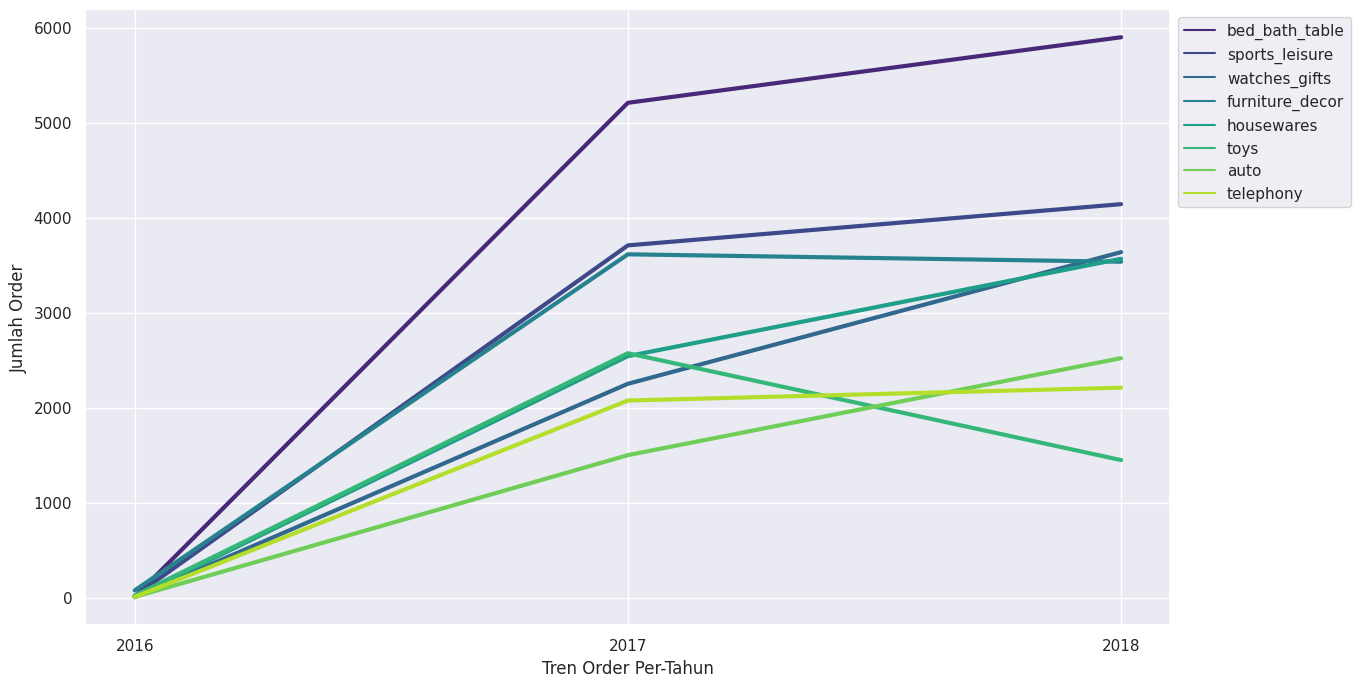

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=del_growth, x ='year', y = 'order_item_id',
                  hue='product_category_name', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Jumlah Order')
plt.xlabel('Tren Order Per-Tahun')
plt.show()

#### 3.2 Pengecekan Tren Order Berdasarkan Bulan pada Tahun 2017

In [ ]:
#Dilakukan pemisahan data terlebih dahulu berdasarkan tahun

data_2018 = time_viz[time_viz['year']==2018]
data_2017 = time_viz[time_viz['year']==2017]
data_2016 = time_viz[time_viz['year']==2016]

In [ ]:
del_growth_17 = pd.DataFrame(data_2017.groupby(['product_category_name_english','month']).agg({'order_item_id': ['sum']}).reset_index())
del_growth_17.columns=["product_category_name","month","order_item_id"]
del_growth_17=del_growth_17.sort_values(by="order_item_id",ascending=False)

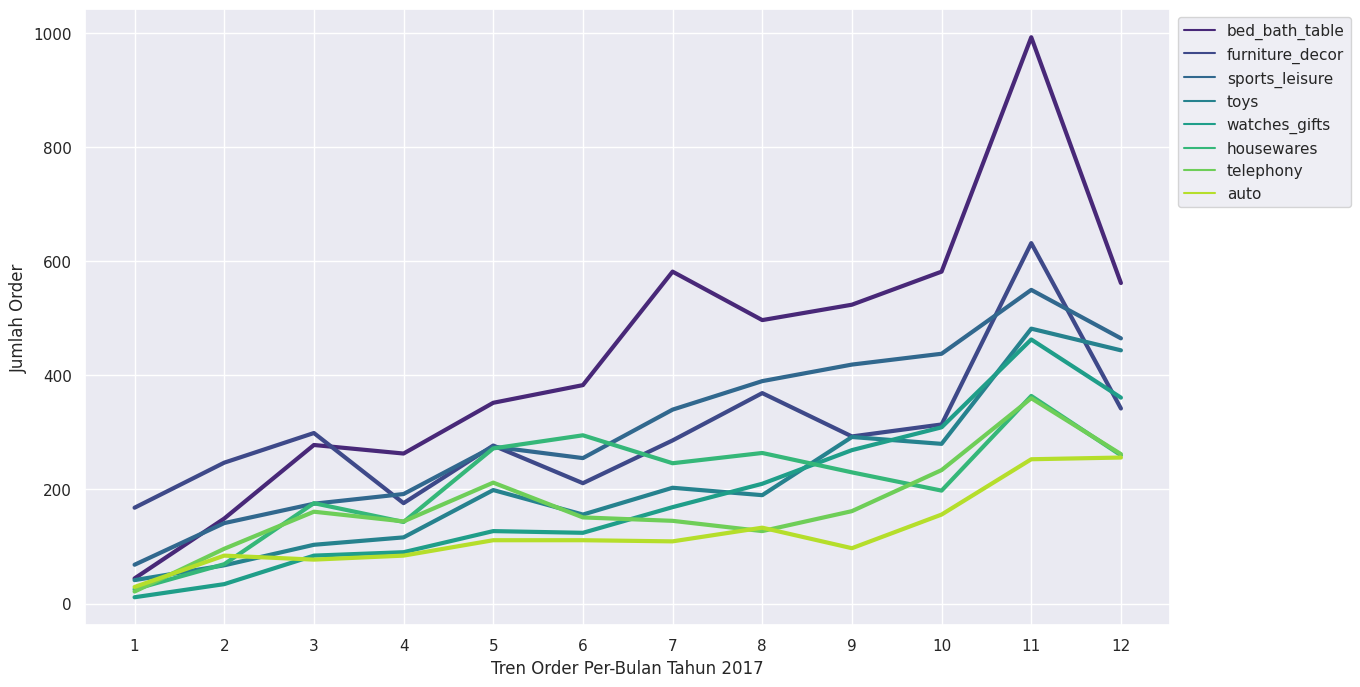

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=del_growth_17, x ='month', y = 'order_item_id',
                  hue='product_category_name', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Jumlah Order')
plt.xlabel('Tren Order Per-Bulan Tahun 2017')
plt.show()

#### 3.3 Pengecekan Tren Order Berdasarkan Bulan pada Tahun 2018


In [ ]:
del_growth_18 = pd.DataFrame(data_2018.groupby(['product_category_name_english','month']).agg({'order_item_id': ['sum']}).reset_index())
del_growth_18.columns=["product_category_name","month","order_item_id"]
del_growth_18=del_growth_18.sort_values(by="order_item_id",ascending=False)

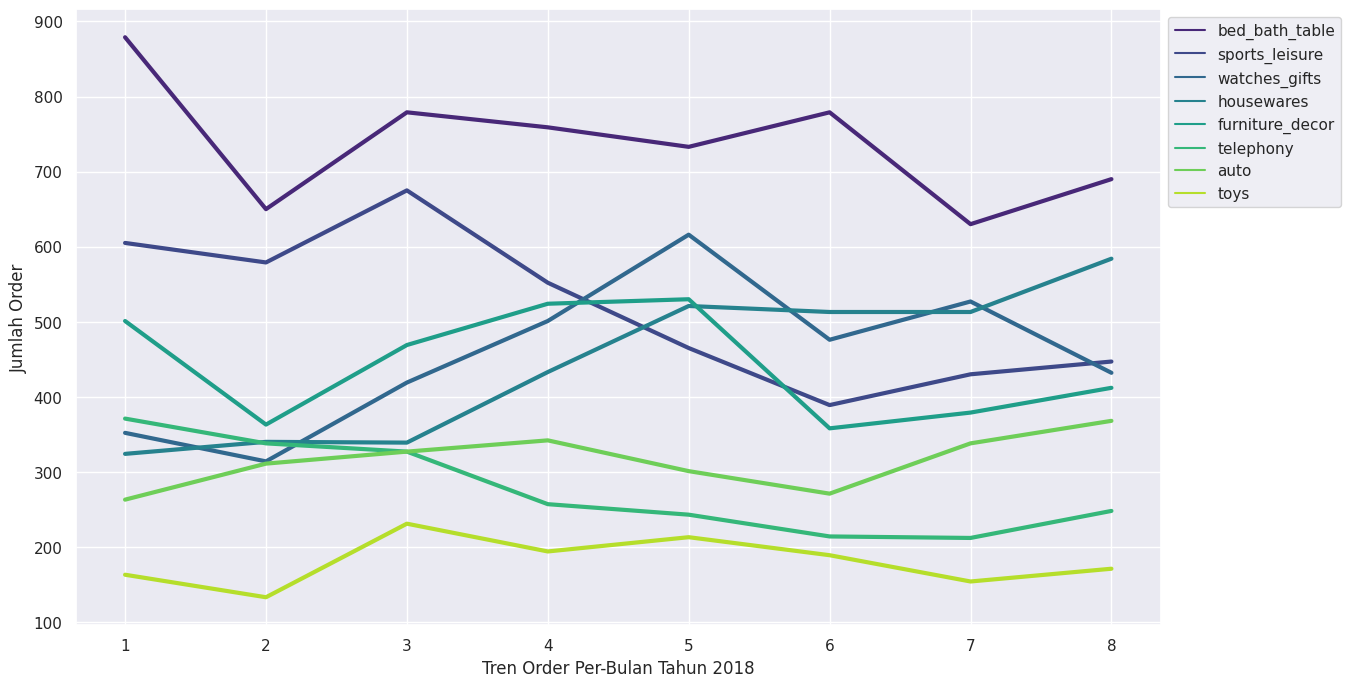

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=del_growth_18, x ='month', y = 'order_item_id',
                  hue='product_category_name', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Jumlah Order')
plt.xlabel('Tren Order Per-Bulan Tahun 2018')
plt.show()

In [ ]:
#Pengecekan durasi waktu mulai saat dari pembelian dengan pembayaran disetujui, penjemputan barang kurir dan barang diterima oleh customer
delivered['long_at_pt'] = (delivered["order_approved_at"] - delivered["order_purchase_timestamp"])#durasi waktu dari order pembelian barang dengan pembayaran diterima
delivered['long_ca_at'] = (delivered["order_delivered_carrier_date"] - delivered["order_approved_at"])#durasi waktu dari pembayaran diterima dengan order dijemput oleh kurir
delivered['long_cu_ca'] = (delivered["order_delivered_customer_date"] - delivered["order_delivered_carrier_date"])#durasi waktu dari order dijemput oleh kurir dengan barang diterima oleh Customer
delivered['long_cu_pt'] = (delivered["order_delivered_customer_date"] - delivered["order_purchase_timestamp"])#durasi waktu dari order pembelian barang dengan barang diterima oleh Customer

In [ ]:
data_datetime=['long_at_pt','long_ca_at','long_cu_ca','long_cu_pt']

In [ ]:
delivered[data_datetime].describe()

,long_at_pt,long_ca_at,long_cu_ca,long_cu_pt
count,98752,98752,98752,98752
mean,0 days 10:17:26.941834089,2 days 18:51:55.216522197,9 days 06:40:45.976061244,12 days 11:50:08.134417530
std,0 days 20:33:02.005970414,3 days 11:58:10.850240178,8 days 17:55:07.957015574,9 days 12:35:21.426179765
min,0 days 00:00:00,-172 days +18:44:38,-17 days +21:41:31,0 days 12:48:07
25%,0 days 00:12:55,0 days 20:54:22.250000,4 days 02:00:07.750000,6 days 17:26:35.500000
50%,0 days 00:20:39,1 days 19:23:36,7 days 02:01:48.500000,10 days 04:14:29.500000
75%,0 days 14:32:18,3 days 13:15:42,11 days 23:46:35.500000,15 days 13:49:14.750000
max,30 days 21:26:37,107 days 01:16:38,205 days 04:35:00,209 days 15:05:12


Jika dilihat durasi saat barang diorder dengan barang diterima oleh Customer memiliki nilai median 10 hari 4 jam 14 menit